In [79]:
#IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cbook import boxplot_stats

#source
#https://www.kaggle.com/code/gabrielsantello/parts-manufacturing-quality-analysis

In [80]:
#GOAL 
#To describe each operators performance and accuracy of manufacturing parts

df = pd.read_csv('Piece_Dimension.csv').drop(['Item_No'], axis=1)
df


,Length,Width,Height,Operator
0,102.67,49.53,19.69,Op-1
1,102.50,51.42,19.63,Op-1
2,95.37,52.25,21.51,Op-1
3,94.77,49.24,18.60,Op-1
4,104.26,47.90,19.46,Op-1
...,...,...,...,...
495,101.24,49.03,20.96,Op-20
496,98.37,52.12,19.68,Op-20
497,96.49,48.78,19.19,Op-20
498,94.16,48.39,21.60,Op-20


In [81]:
df.describe()

,Length,Width,Height
count,500.000000,500.00000,500.000000
mean,99.769140,49.93288,20.293220
std,4.107471,2.11382,1.051718
min,87.520000,42.74000,17.370000
25%,96.835000,48.34000,19.475000
50%,99.565000,49.82500,20.310000
75%,102.035000,51.46250,21.142500
max,116.600000,58.26000,23.390000


In [82]:
op_num = df.value_counts('Operator')
op_num

Operator
Op-9     35
Op-14    35
Op-7     33
Op-5     33
Op-10    30
Op-18    29
Op-3     29
Op-1     26
Op-16    25
Op-2     25
Op-17    23
Op-20    21
Op-13    21
Op-4     21
Op-19    21
Op-12    20
Op-8     20
Op-15    19
Op-6     18
Op-11    16
Name: count, dtype: int64

<AxesSubplot: xlabel='Operator', ylabel='count'>

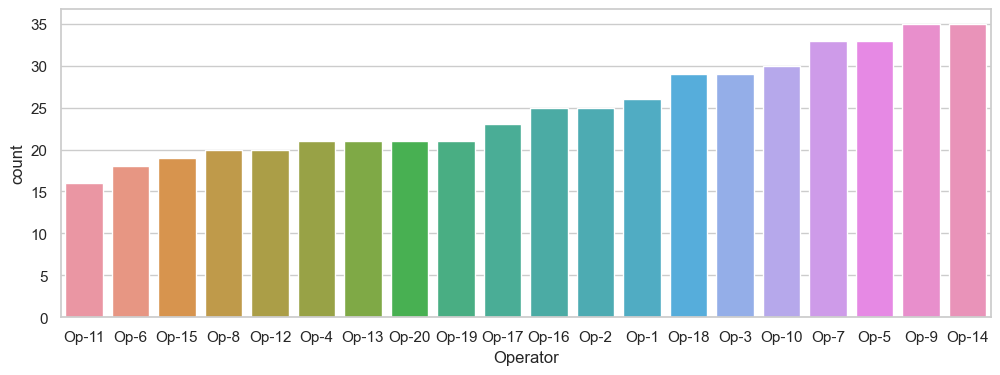

In [83]:
plt.figure(figsize=(12,4))
sns.set_theme(style="whitegrid")
# sns.countplot(data=df, x='Operator', order=df['Operator'].value_counts().index) Descending Order
sns.countplot(data=df, x='Operator', order=df['Operator'].value_counts().index[::-1])

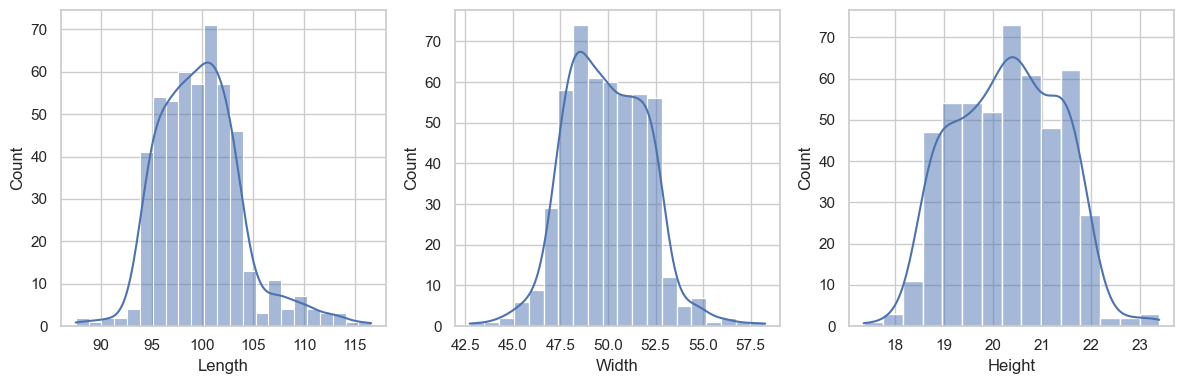

In [84]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

sns.histplot(data=df, x=df['Length'], kde=True, ax=axes[0])
sns.histplot(data=df, x=df['Width'], kde=True, ax=axes[1])
sns.histplot(data=df, x=df['Height'], kde=True, ax=axes[2])

fig.tight_layout()

# From the chart it can be concluded that the target measurements are 100, 50, 20 for L, W, H
# Next is to figure which operators are the most innacurate
# Need to determine what is considered innacurate 

In [47]:
# Determine what is considered accurate by seeing the operators standard deviation
# in this df, each operator has multiple different measurements so STD can be calculated
# determine what is considered accurate in regards to 25% of the standard deviation 

accuracy = df.groupby(['Operator']).agg(np.std)
accuracy

,Length,Width,Height
Operator,,,
Op-1,5.080231,2.910173,0.840233
Op-10,2.827704,1.891860,0.969951
Op-11,2.794258,1.738051,0.889455
Op-12,3.259311,1.717653,1.104962
Op-13,3.084170,2.013510,1.068644
Op-14,2.801667,1.709843,1.001338
Op-15,2.855446,1.774941,1.160737
Op-16,2.524761,1.662821,0.891185
Op-17,2.872636,1.828884,1.095622


In [86]:
feat = ['Length','Width','Height']
for col in feat:
    print(col)
    print(pd.Series(boxplot_stats(df[col])[0]))
    print('\n')

    

Length
mean                                               99.76914
iqr                                                     5.2
cilo                                              99.199895
cihi                                              99.930105
whishi                                               109.79
whislo                                                89.82
fliers    [87.52, 88.28, 110.54, 110.18, 110.72, 112.69,...
q1                                                   96.835
med                                                  99.565
q3                                                  102.035
dtype: object


Width
mean                          49.93288
iqr                             3.1225
cilo                         49.605761
cihi                         50.044239
whishi                           56.04
whislo                            43.8
fliers    [42.74, 57.26, 58.26, 56.26]
q1                               48.34
med                             49.825
q3                  

In [105]:
def get_status(row):
    
    # when applying the function get_status(), it is called each row at a time
    # row is a pd.Series
    #print('row: ', row, '\n') <- try if you want to see what gets passed to the function
    for col in feat:
        # in each row you have to check 3 values (3 columns)
        # if this if condition is True only once, the function returns 'Defective'
        if (
            (row[col] > boxplot_stats(df[col])[0]['whishi']) 
            or 
            (row[col] < boxplot_stats(df[col])[0]['whislo'])
        ):
            
            return 'Defective'
        
    # if it didn't return anything till here (-> 3x condition was False) it will return `Perfect
    return 'Perfect'


df['Status'] = df.apply(get_status,axis=1)

 # For instance, to return the Defective rows, you can use a single measure: 
#df[df['Length'] < boxplot_stats(df['Length'])[0]['whislo']]
    # Or any Defective rows:
defective = df[df['Status']=='Defective']

defective.value_counts('Operator')

Operator
Op-3    8
Op-5    8
Op-4    3
Op-2    1
Name: count, dtype: int64

In [108]:
df['Status'].value_counts() 

Status
Perfect      480
Defective     20
Name: count, dtype: int64

<AxesSubplot: xlabel='Operator', ylabel='count'>

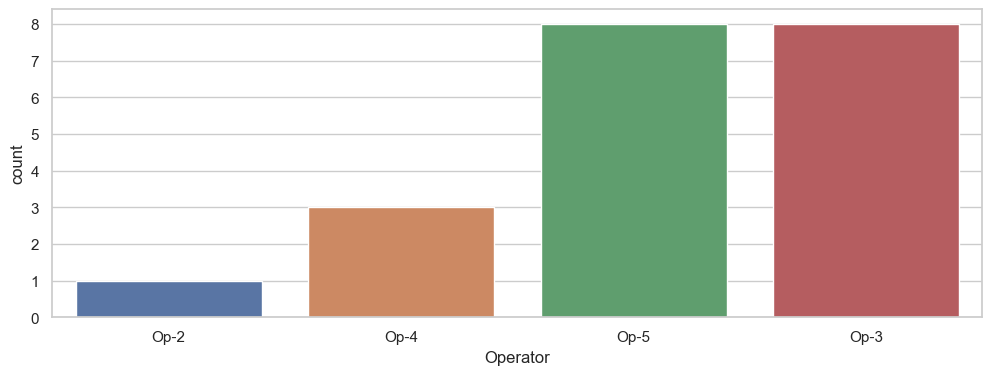

In [107]:
#suggest 

plt.figure(figsize=(12,4))
sns.set_theme(style="whitegrid")
# sns.countplot(data=df, x='Operator', order=df['Operator'].value_counts().index) Descending Order
sns.countplot(data=defective, x='Operator', order=defective['Operator'].value_counts().index[::-1])

In [110]:
#Determines what percentage of parts the operator makes are defective
defective_op = df[df['Status'] == 'Defective']['Operator'].unique()
defective_parts = df[df['Status'] == 'Defective']['Operator'].value_counts()
defective_total = df['Operator'].value_counts()
defective_comparision = (defective_parts/defective_total)[defective_op]
defective_comparision

Operator
Op-2    0.040000
Op-3    0.275862
Op-4    0.142857
Op-5    0.242424
Name: count, dtype: float64

<AxesSubplot: ylabel='count'>

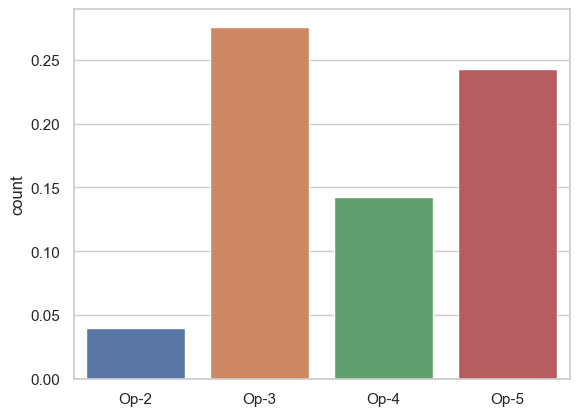

In [113]:
sns.barplot(x=defective_op, y=defective_comparision)